In [574]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [575]:
#Reading dataset
df=pd.read_csv('Iris.csv')

In [576]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [577]:
#checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [578]:
#dropping id column
df.drop(['Id'],1,inplace=True)

In [579]:
#checking stats
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
90%,6.900000,3.610000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000
max,7.900000,4.400000,6.900000,2.500000


In [580]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [581]:
df['Species']=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [582]:
from sklearn.decomposition import PCA

In [583]:
pca=PCA(n_components=2)
pca_com=pca.fit_transform(x)
data_pca=pd.DataFrame(pca_com,columns=['PCA_1','PCA_2'])
data_pca['Output']=y.reset_index(drop=True)

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

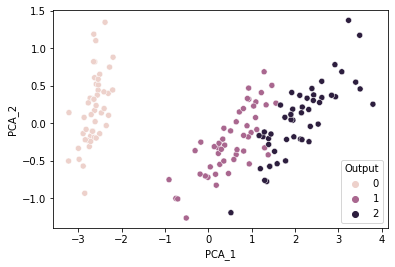

In [584]:
import seaborn as sns
sns.scatterplot(x='PCA_1',y='PCA_2',data=data_pca,hue='Output')

In [585]:
mean_data=df.groupby(['Species']).mean().reset_index()
mean_data

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,5.006,3.418,1.464,0.244
1,1,5.936,2.770,4.260,1.326
2,2,6.588,2.974,5.552,2.026


# From above we can see that mean of features for each species are different 

# 'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2

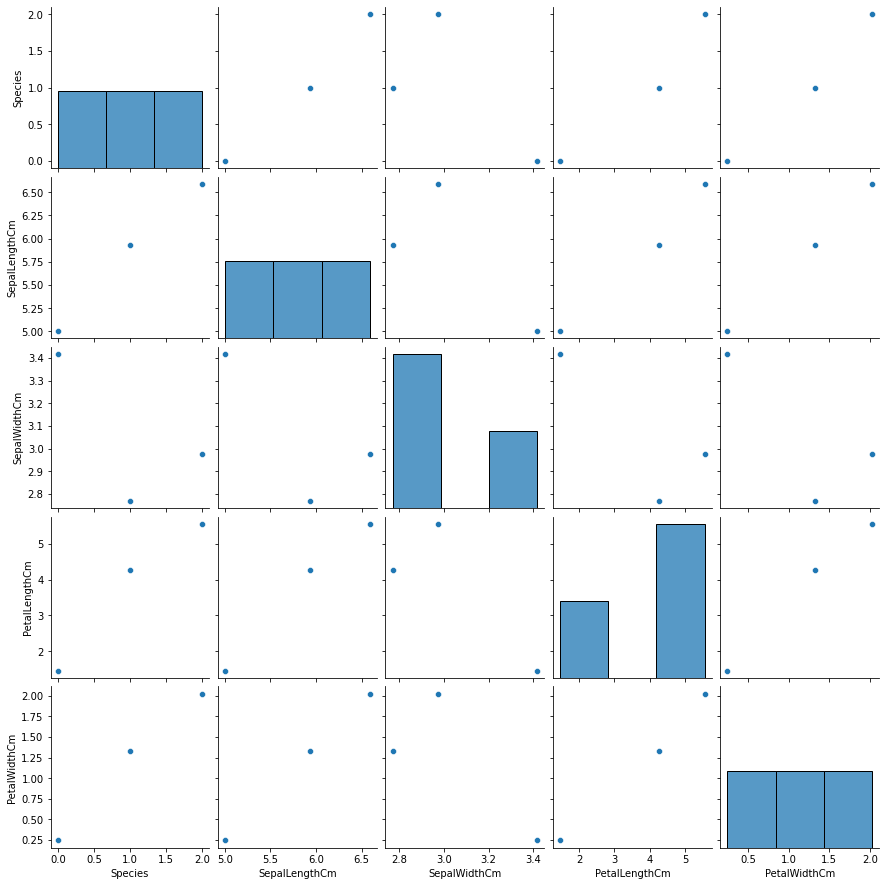

In [586]:
sns.pairplot(mean_data)

In [587]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [588]:
#outlier Plotting 
def plotting_outlier(data,col):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(x=data[col])
    plt.title(f'Distribution Plot {col}')
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

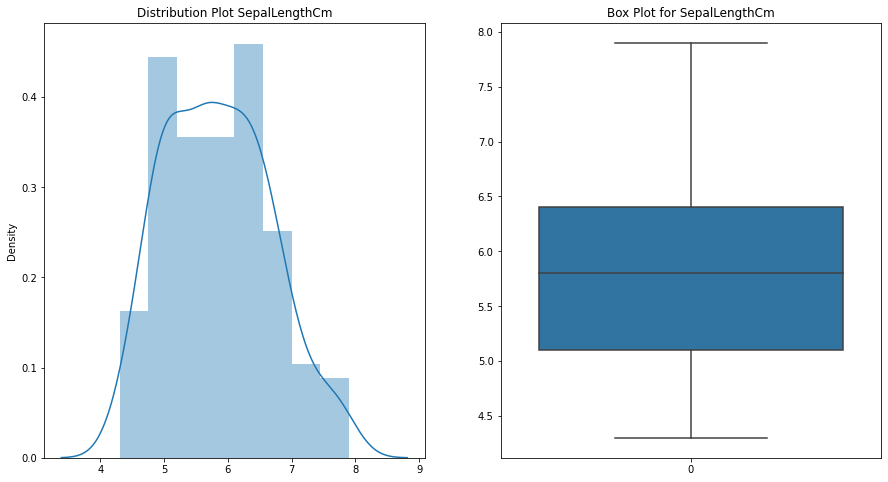

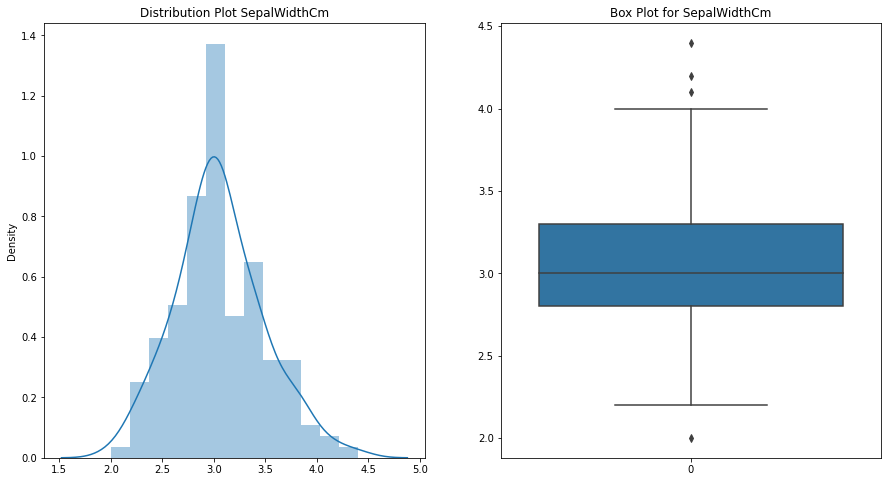

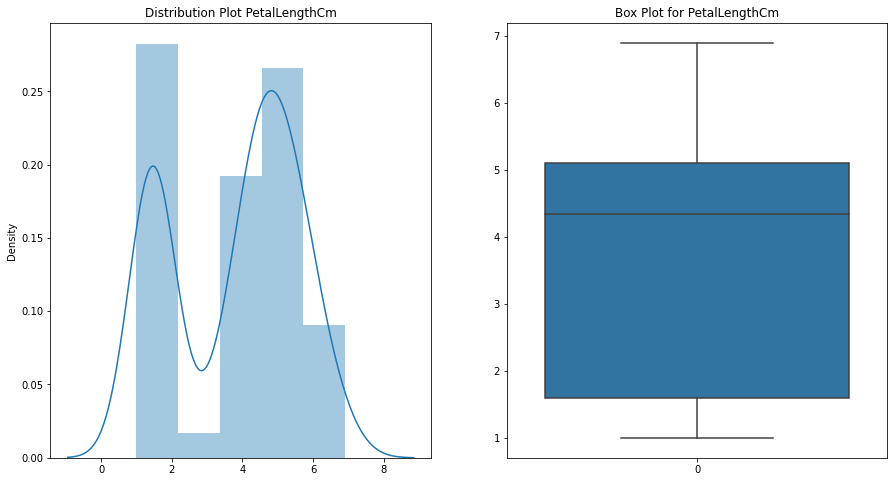

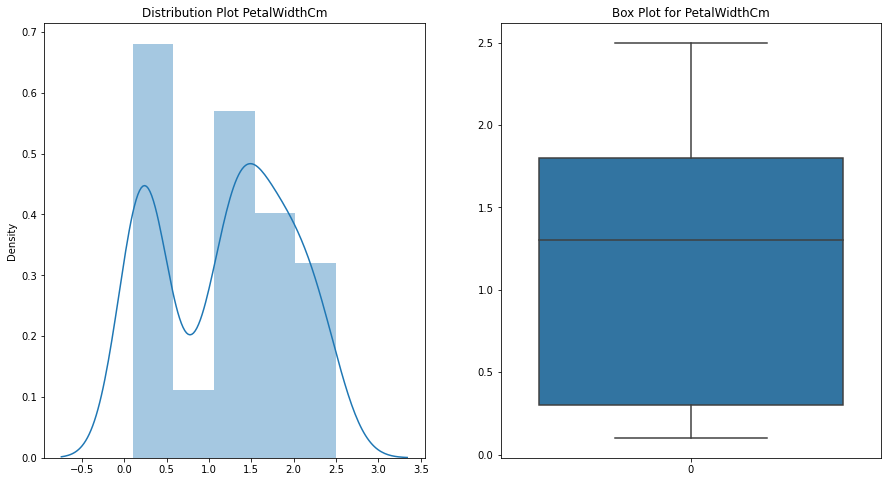

In [589]:
for i in df.drop(['Species'],1).columns:
    plotting_outlier(df,i)

#Not that much outlier in the data set 

<AxesSubplot:>

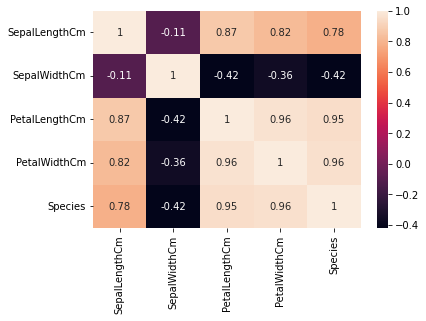

In [590]:
sns.heatmap(df.corr(),annot=True)

In [591]:
df['Species'].unique()

array([0, 1, 2], dtype=int64)

In [592]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


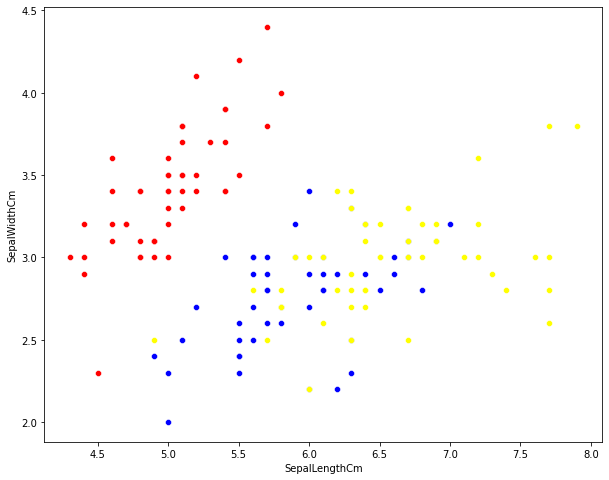

In [593]:
color=['Red','Blue','Yellow']
plt.figure(figsize=(10,8))
for i in range (0,3):
    
    data=df[df['Species']==i]    
    sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'],color=color[i])
plt.show()

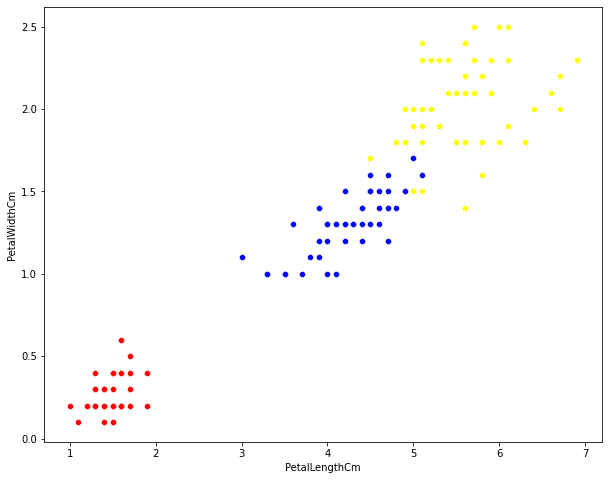

In [594]:
color=['Red','Blue','Yellow']
plt.figure(figsize=(10,8))
for i in range (0,3):
    
    data=df[df['Species']==i]    
    sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],color=color[i])
plt.show()

In [595]:
x=df.drop(['Species'],1)
y_=df['Species']


In [596]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_,test_size=0.25,random_state=12)

In [597]:
x_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [598]:
#Scaling the  training data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]=scale.fit_transform(x_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

x_test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]=scale.fit_transform(x_test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])


In [599]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [600]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif

,Features,VIF
0,SepalLengthCm,7.477883
1,SepalWidthCm,2.044226
2,PetalLengthCm,33.549987
3,PetalWidthCm,16.508015


In [601]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [602]:
models={'Random_forest':RandomForestClassifier(),'Logistic':LogisticRegression(),'XGBoost':XGBClassifier(),'Knn':KNeighborsClassifier()}

In [603]:
from sklearn.model_selection import cross_val_score

In [604]:
#custom define fucntion to check the accuracy of  each model 

def model_selection(models,xtrain,ytrain,xtest,ytest):
    models.fit(xtrain,ytrain)
    y_train_pred=models.predict(xtrain)
    return models.score(xtrain,ytrain),models.score(xtest,ytest)
   
    

In [605]:
#passing the arguments to predict the accuracy 
accuracy_train=[]
accuract_test=[]

for key,value in models.items():
        accu_tr,acc_ts=model_selection(value,x_train,y_train,x_test,y_test)
        accuracy_train.append(accu_tr)
        accuract_test.append(acc_ts)

       

In [606]:
accuracy_scores_data=pd.DataFrame({'Models':models.keys(),'Accuracy_score_train':accuracy_train,'Accuracy_test':accuract_test})

In [607]:
accuracy_scores_data

,Models,Accuracy_score_train,Accuracy_test
0,Random_forest,1.000000,0.921053
1,Logistic,0.973214,0.947368
2,XGBoost,1.000000,0.921053
3,Knn,0.955357,0.842105


In [608]:
def roccurve(model2,xtrain,ytrain,model_name):
    model2.fit(xtrain,ytrain)
    y_train_predicted_prob=model2.predict_proba(xtrain)
    fpr1, tpr1, thresh1 = roc_curve(ytrain, y_train_predicted_prob[:,1], pos_label=1)
    plt.plot(fpr1,tpr1,label=model_name,marker='*',linestyle='dashed',color='Blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

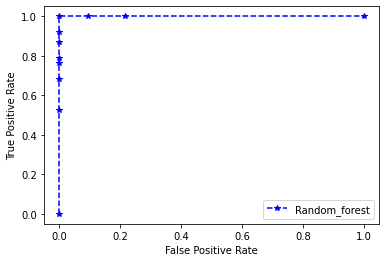

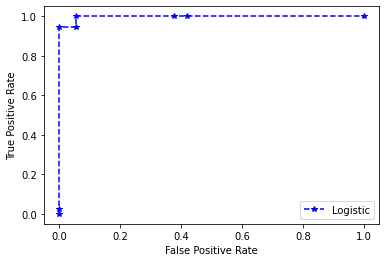

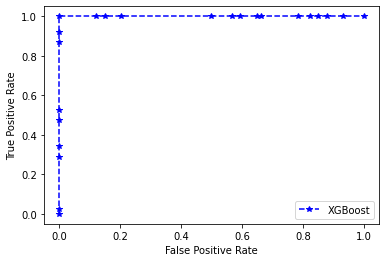

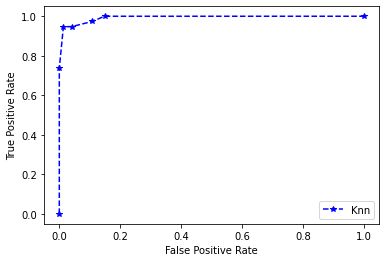

In [609]:
for key,value in models.items():
    roccurve(value,x_train,y_train,key)

In [610]:
final_model=LogisticRegression()

In [611]:
final_model.fit(x_train,y_train)

LogisticRegression()

In [612]:
y_train_pred_2=final_model.predict(x_train)

In [613]:
confusion_matrix(y_train_pred_2,y_train)

array([[35,  0,  0],
       [ 0, 36,  1],
       [ 0,  2, 38]], dtype=int64)

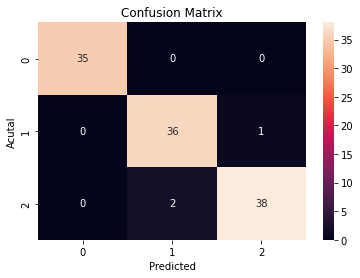

In [614]:
sns.heatmap(confusion_matrix(y_train_pred_2,y_train),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix')
plt.show()

In [615]:
print(classification_report(y_train_pred_2,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.97      0.96        37
           2       0.97      0.95      0.96        40

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [616]:
y_train_prob=final_model.predict_proba(x_train)

In [617]:
fpr,tpr,thr=roc_curve(y_train,y_train_prob[:,1],pos_label=1)

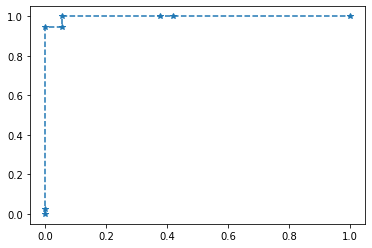

In [618]:

plt.plot(fpr,tpr,linestyle='--',marker='*')

In [619]:
#select of best threshold value
gmeans = np.sqrt(tpr * (1-fpr))

In [620]:
pos=np.argmax(gmeans)

In [621]:
thr[pos]

0.6401625984418339

In [622]:
print(f'For Logistics best threshold ={thr[pos]} and G-means = {gmeans[pos]} ')

For Logistics best threshold =0.6401625984418339 and G-means = 0.9733285267845752 


In [623]:
def cutom_pred(ytrain,ypred):
    return (ypred>0.640).astype(int)

In [625]:
#predict after fitting threshold value 
final_op=cutom_pred(y_train,y_train_prob[:,1])

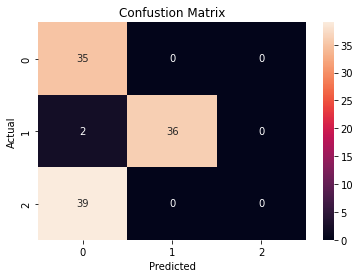

In [626]:
sns.heatmap(confusion_matrix(y_train,final_op),annot=True,fmt='g')
plt.title('Confustion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()